In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
tagged_reviews = pd.read_pickle("feature_extracted_reviews.pkl")

# 1. what words immediately precede feature words?
elems = [" chair", " table", " sofa", " couch", " art", " window", " decor ", " wall"]
freqs = []

for elem in elems:
    pre_words = []
    rel_reviews = tagged_reviews.text[tagged_reviews.text.str.contains(elem)]
    for review in rel_reviews:
        idx = review.find(elem)
        end_idx = idx - 2
        beg_idx = end_idx
        while(review[beg_idx] != " "):
            beg_idx -= 1

        pre_words.append(review[beg_idx: end_idx+2])
        
    c = Counter(pre_words)
    freqs.append(c)

In [5]:
# 2. what is the specific context in which the key features are being mentioned?

from nltk.tokenize import sent_tokenize

contexts = []
for elem in elems:
    elem_contexts = []
    rel_reviews = tagged_reviews.text[tagged_reviews.text.str.contains(elem)]
    for review in rel_reviews:
        sentences = sent_tokenize(review.decode('utf8'))
        #display(sentences)
        for sentence in sentences:
            if elem in sentence:
                elem_contexts.append(sentence)
                
    contexts.append(elem_contexts)

In [7]:
contexts_df = pd.DataFrame()
idx = 0

for elem in elems:
    col_df = pd.DataFrame(data=contexts[idx], columns=[elem])
    contexts_df = pd.concat([contexts_df, col_df], axis=1)
    idx += 1
    
contexts_df.to_pickle("./feature_contexts.pkl")

In [79]:
count = 0
count1 = 0
for line in contexts[0]:
    if any(word in line for word in [" plastic"]):
        count += 1
    if any(word in line for word in [" light"]):
        count1 += 1
        
print count/float(len(contexts[0]))
print count1/float(len(contexts[5]))
print len(contexts[6])

0.00755667506297
0.0530973451327
165


In [86]:
for line in contexts[7]:
    print line
    print "-------"

shelves upon shelves of the rarest books and manuscripts in the country line the walls, and although you can't touch anything without asking a librarian's permission, it's still interesting to venture inside and take a quick picture.
-------
my advice for the fellow yelpers, if you are in downtown or near westmount or feeling a pinch on your wallet , do check out this place, you will love it .
-------
its very clean and since most of the walls are windows, light goes through & it lights up the place & gets you in the mood to study & learn sometbing new.
-------
oh also great artwork on the walls as well as jewelry - basically the owner has kept aside space for local craftspeople to sell there wares.
-------
there's even a window in the back wall that you can watch the rock climbers from in the gym next door!
-------
original windows & wood floors, calm, muted colors on the walls.
-------
lining the back wall is a long series of book cases holding biographies.
-------
another bad ass ho

In [94]:
places = []
for line in tagged_reviews.business_name[tagged_reviews.text.str.contains(" window")]:
    places.append(line)
    
c = Counter(places)
display(c)

Counter({'"5am Caf\xc3\xa9"': 1,
         '"Agincourt District Library"': 1,
         '"Altitude Coffee Lab"': 3,
         '"Angus Glen Public Library"': 2,
         '"Annette Branch Public Library"': 1,
         '"Anticaf\xc3\xa9"': 2,
         '"Appaloosa Library"': 2,
         '"Arabian Library"': 1,
         '"Aroma Espresso Bar"': 7,
         '"Bibliotheque Marc-Favreau"': 1,
         '"Biblioth\xc3\xa8que Mile End Mordecai-Richler"': 1,
         '"Biblioth\xc3\xa8que et Archives Nationales du Qu\xc3\xa9bec"': 2,
         '"Birds And Beans Cafe"': 1,
         '"Black Cat Coffee House"': 2,
         '"Black Medicine"': 1,
         '"Black Rock Coffee"': 7,
         '"Boss Coffee"': 6,
         '"Brookbanks Public Library"': 1,
         '"Burton Barr Central Library"': 18,
         '"CO+HOOTS"': 1,
         '"CSI Coffee Pub"': 1,
         '"Cafe de Noir"': 1,
         '"Caf\xc3\xa9 Des Aliz\xc3\xa9s"': 2,
         '"Caf\xc3\xa9 In Vivo"': 2,
         '"Caf\xc3\xa9 dei Campi"': 1,
  

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

neg = []
pos = []
neu = []
com = []
for sentence in contexts_df[" window"].dropna():
    #print sentence 
    ss = sid.polarity_scores(sentence)
    neg.append(ss["neg"])
    pos.append(ss["pos"])
    neu.append(ss["neu"])
    com.append(ss["compound"])
    
print "negative", np.mean(neg)
print "positive", np.mean(pos)
print "neutral", np.mean(neu)
print "compound", np.mean(com)

negative 0.01917699115044248
positive 0.16302064896755164
neutral 0.8178023598820058
compound 0.3905622418879056


In [136]:
neg = []
pos = []
neu = []
com = []
for review in tagged_reviews.text:
    #print sentence 
    sentences = sent_tokenize(review.decode('utf8'))
    for sentence in sentences:
        #if " the" in sentence:
        ss = sid.polarity_scores(sentence)
        neg.append(ss["neg"])
        pos.append(ss["pos"])
        neu.append(ss["neu"])
        com.append(ss["compound"])
    
print "negative", np.mean(neg)
print "positive", np.mean(pos)
print "neutral", np.mean(neu)
print "compound", np.mean(com)

negative 0.03423229389827819
positive 0.1987715623264302
neutral 0.7612518765373323
compound 0.2809892771562327


In [108]:
neg = []
pos = []
neu = []
com = []
for review in tagged_reviews.text[tagged_reviews.text.str.contains(" wonderful")]:
    #print sentence 
    sentences = sent_tokenize(review.decode('utf8'))
    for sentence in sentences:
        if " wonderful" in sentence:
            ss = sid.polarity_scores(sentence)
            neg.append(ss["neg"])
            pos.append(ss["pos"])
            neu.append(ss["neu"])
            com.append(ss["compound"])
    
print "negative", np.mean(neg)
print "positive", np.mean(pos)
print "neutral", np.mean(neu)
print "compound", np.mean(com)

negative 0.015048913043478261
positive 0.38655706521739125
neutral 0.5984021739130434
compound 0.6897801630434782


In [145]:
neg = []
pos = []
neu = []
com = []
for review in tagged_reviews.text[tagged_reviews.text.str.contains(" plastic ")]:
    #print sentence 
    sentences = sent_tokenize(review.decode('utf8'))
    for sentence in sentences:
        if " plastic " in sentence:
            ss = sid.polarity_scores(sentence)
            neg.append(ss["neg"])
            pos.append(ss["pos"])
            neu.append(ss["neu"])
            com.append(ss["compound"])
    
print "negative", np.mean(neg)
print "positive", np.mean(pos)
print "neutral", np.mean(neu)
print "compound", np.mean(com)

negative 0.04117241379310345
positive 0.08072413793103447
neutral 0.8781034482758621
compound 0.16681724137931034


In [9]:
feature_words = [" chair", " table", " sofa", " couch", " art", " window", " decor ", " wall", " natural light", 
                 " water", " fountain", " stairs", " staircase", " internet", " local art", " music", 
                " big table", " small table"]
adjectives = [" cozy", " comfy", " comfortable", " clean", " dirty", " nois", " quiet"]
keywords = feature_words + adjectives

In [26]:
compound_scores = []

for word in keywords:
    #neg = []
    #pos = []
    #neu = []
    com = []
    for review in tagged_reviews.text[tagged_reviews.text.str.contains(word)]:
        sentences = sent_tokenize(review.decode('utf8'))
        for sentence in sentences:
            if word in sentence:
                ss = sid.polarity_scores(sentence)
                #neg.append(ss["neg"])
                #pos.append(ss["pos"])
                #neu.append(ss["neu"])
                com.append(ss["compound"])

    compound_scores.append(np.mean(com))
    

display(compound_scores)

[0.319403274559194,
 0.23232517766497462,
 0.3535075,
 0.2986679245283019,
 0.38459813432835827,
 0.3905622418879056,
 0.5020357575757576,
 0.3160648464163823,
 0.6013303797468353,
 0.22288053691275164,
 0.3627055555555555,
 0.14608043478260868,
 0.35508181818181817,
 0.24653850931677015,
 0.41466279069767453,
 0.4377768321513002,
 0.24038749999999998,
 0.13120714285714286,
 0.4217660305343512,
 0.3896673202614379,
 0.6570576923076923,
 0.5845090792838874,
 -0.20056241134751773,
 0.06729528985507247,
 0.32887711640211637]

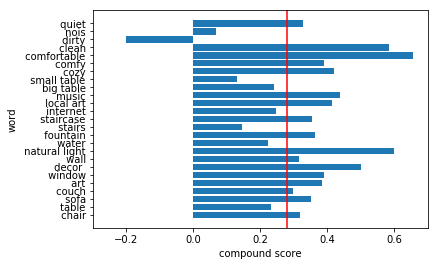

In [16]:
y_pos = [i for i, _ in enumerate(keywords)]

plt.barh(y_pos, compound_scores)
plt.ylabel("word")
plt.xlabel("compound score")

plt.yticks(y_pos, keywords)
plt.axvline(x=0.2809892771562327, color='red')
plt.xlim(-0.3, 0.7)
plt.show()

In [19]:
# control analysis
compound_scores1 = []

# nouns
for word in feature_words:
    #neg = []
    #pos = []
    #neu = []
    com = []
    for review in tagged_reviews.text[tagged_reviews.text.str.contains(word)]:
        sentences = sent_tokenize(review.decode('utf8'))
        for sentence in sentences:
            if word in sentence:
                ss = sid.polarity_scores(sentence.replace(word, " chair"))
                neg.append(ss["neg"])
                pos.append(ss["pos"])
                neu.append(ss["neu"])
                com.append(ss["compound"])

    compound_scores1.append(np.mean(com))
    
# adjectives
for word in adjectives:
    #neg = []
    #pos = []
    #neu = []
    com = []
    for review in tagged_reviews.text[tagged_reviews.text.str.contains(word)]:
        sentences = sent_tokenize(review.decode('utf8'))
        for sentence in sentences:
            if word in sentence:
                ss = sid.polarity_scores(sentence.replace(word, " blue"))
                neg.append(ss["neg"])
                pos.append(ss["pos"])
                neu.append(ss["neu"])
                com.append(ss["compound"])

    compound_scores1.append(np.mean(com))

display(compound_scores1)

[0.319403274559194,
 0.23232517766497462,
 0.3535075,
 0.2986679245283019,
 0.38459813432835827,
 0.3905622418879056,
 0.5022012121212122,
 0.3160648464163823,
 0.3977632911392405,
 0.22288053691275164,
 0.3627055555555555,
 0.14608043478260868,
 0.35508181818181817,
 0.24653850931677015,
 0.41466279069767453,
 0.4377768321513002,
 0.24038749999999998,
 0.13120714285714286,
 0.4217660305343512,
 0.3896673202614379,
 0.3739173076923077,
 0.37701675191815853,
 0.1604276595744681,
 0.1254177536231884,
 0.32887711640211637]

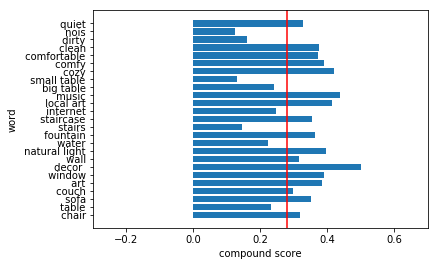

In [18]:
y_pos = [i for i, _ in enumerate(keywords)]

plt.barh(y_pos, compound_scores)
plt.ylabel("word")
plt.xlabel("compound score")

plt.yticks(y_pos, keywords)
plt.axvline(x=0.2809892771562327, color='red')
plt.xlim(-0.3, 0.7)

plt.show()

[356, 825, 41, 102, 456, 317, 166, 272, 79, 260, 50, 39, 21, 279, 44, 390, 9, 15, 250, 154, 308, 765, 126, 228, 645]


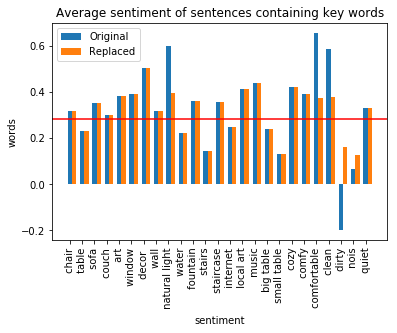

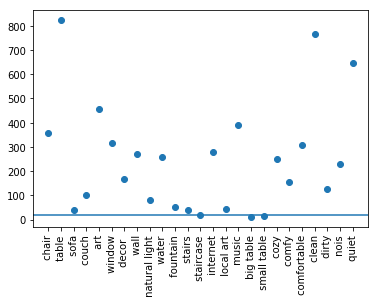

In [76]:
counts = []
for word in keywords:
    counts.append(tagged_reviews.text[tagged_reviews.text.str.contains(word)].count())
    
print counts

y_pos = [i for i, _ in enumerate(keywords)]

fig, ax = plt.subplots()
width = 0.35

p1 = ax.bar(y_pos, compound_scores, width)
p2 = ax.bar(np.add(y_pos, width), compound_scores1, width)

ax.set_title('Average sentiment of sentences containing key words')
ax.set_ylabel('words')
ax.set_xlabel('sentiment')

ax.legend((p1[0], p2[0]), ('Original', 'Replaced'))
plt.xticks(y_pos, keywords, rotation='vertical')
plt.axhline(y=0.2809892771562327, color='red')

plt.show()

plt.scatter(y_pos, counts)
plt.xticks(y_pos, keywords, rotation='vertical')
plt.axhline(y=20)
plt.show()

In [180]:
sid.polarity_scores("dark")

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [79]:
from nltk.tokenize import word_tokenize

all_words = []

for word in [" window"]:
    
    for review in tagged_reviews.text[tagged_reviews.text.str.contains(word)]:
        sentences = sent_tokenize(review.decode('utf8'))
        for sentence in sentences:
            if word in sentence:
                words = word_tokenize(sentence)
                all_words = all_words + words
                
c = Counter(all_words)
display(c)


Counter({u'limited': 2,
         u'all': 26,
         u'since': 12,
         u'forget': 1,
         u'stained-glass': 1,
         u'represent': 1,
         u'wrought-iron': 1,
         u'lack': 2,
         u'yellow': 1,
         u'month': 1,
         u'four': 1,
         u'facilities': 1,
         u'straws': 1,
         u'bibliotheca': 1,
         u'hanging': 1,
         u'research': 1,
         u'hate': 1,
         u'children': 6,
         u'glimpse': 1,
         u'feeding': 1,
         u'hunting': 1,
         u'hayden': 1,
         u'snowing': 1,
         u'radiators\\/benches': 1,
         u'cushy': 3,
         u'sparkling': 1,
         u'mmmmmmm': 1,
         u'to': 217,
         u'bike': 3,
         u'preserved': 1,
         u'under': 1,
         u'blows': 1,
         u'dc\\/vertigo': 1,
         u'started': 1,
         u'returning': 2,
         u'very': 20,
         u'puzzles': 1,
         u'practicality': 1,
         u'every': 2,
         u'storytime': 1,
         u'fall': 2,
  

In [80]:
from nltk.corpus import stopwords
import string

for word in sorted(c, key=c.get, reverse=True):
    if word not in stopwords.words('english') and word not in string.punctuation:       
        print word, c[word]

windows 224
window 114
's 69
library 52
light 45
floor 43
large 42
natural 40
big 40
nice 38
... 33
like 30
love 28
open 27
area 27
great 27
glass 26
huge 26
lots 25
view 25
n't 25
chairs 25
room 24
ceiling 24
tables 23
study 22
space 22
place 22
sit 22
one 21
even 20
seating 20
building 20
really 19
back 17
inside 17
get 17
high 17
table 17
reading 16
beautiful 16
lighting 16
good 16
see 16
branch 16
along 15
views 15
look 15
next 15
books 15
outside 14
small 14
architecture 13
right 13
people 13
bright 13
plenty 13
day 13
seats 13
modern 12
sunlight 12
many 12
quiet 12
since 12
section 12
park 12
lot 12
wall 12
ceilings 11
looking 11
read 11
comfy 11
let 11
use 11
work 10
south 10
free 10
spacious 10
little 10
interior 10
also 10
pretty 10
front 10
comfortable 10
rooms 10
especially 9
drive 9
cafe 9
facing 9
time 9
sun 9
feel 9
find 9
go 9
book 9
side 8
top 8
away 8
near 8
spot 8
take 8
corner 8
seat 8
've 8
wifi 8
door 8
long 8
're 8
overlooking 8
could 8
need 8
second 7
kids 7
woul

quirky 1
holder 1
10 1
12 1
nathan 1
midtown 1
lvccld-sigh 1
wifi.. 1
nicer 1
turned 1
afternoons 1
pastry 1
saw 1
speakers 1
form 1
snowy 1
normal 1
price 1
importantly 1
librarian 1
america 1
conspicuous 1
encased 1
napkin 1
rating 1
madison 1
discovered 1
spaces 1
stained 1
stain 1
easiler 1
lighten 1
truly 1
prime 1
skyline 1
lechter 1
marred 1
committed 1
lower-floor 1
1925 1
calendar 1
ruined 1
surfaces 1
ways 1
review 1
bridge\/lighthouse 1
teens 1
screen 1
concentrate 1
contract 1
tour 1
disappointment 1
nearby 1
armchair 1
period 1
rebuild 1
write\/read\/research 1
rebuilt 1
peaking 1
shopping 1
offered 1
readings 1
photos 1
tomes 1
paying 1
shaft 1
cash 1
ongoing 1
newspaper 1
slippers 1
different 1
figurine 1
week 1
booths 1
streetscape 1
decently 1
edges 1
awesomeness 1
inhalation 1
breezy 1
breeze 1
foyer 1
outdoor 1
money 1
rest 1
speed 1
desktop 1
\/ 1
real 1
overlooks 1
traffic 1
lady 1
libray 1
rear 1
furniture 1
escalators 1
conditional 1
mood 1
favourite 1
necessitat

In [61]:
tagged_reviews.text[tagged_reviews.text.str.contains(" water")].count()

260